# Bayesian Belief Networks

## Introduction

https://towardsdatascience.com/introduction-to-bayesian-belief-networks-c012e3f59f1b

https://machinelearningmastery.com/introduction-to-bayesian-belief-networks/

https://analyticsindiamag.com/a-guide-to-inferencing-with-bayesian-network-in-python/

## Content

1. <a href = "#1.-What-is-Bayesian-Network?">What is Bayesian Network?</a>
2. <a href = "#2.-What-is-Directed-Acyclic-Graph-(DAG)?">What-is-Directed-Acyclic-Graph-(DAG)?</a>
3. <a href = "#3.-The-Maths-Behind-the-Bayesian-Network">The Maths Behind the Bayesian Network</a>
4. <a href = "#4.-Inferencing-with-Bayesian-Network-in-Python">Inferencing with Bayesian Network in Python</a>

### Libraries

In [1]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination
import networkx as nx
import pylab as plt

c:\program files\python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 1. What is Bayesian Network?

A Bayesian network (also spelt Bayes network, Bayes net, belief network, or judgment network) is a probabilistic graphical model that depicts a set of variables and their conditional dependencies using a directed acyclic graph (DAG). 

Bayesian networks are perfect for taking an observed event and forecasting the likelihood that any of numerous known causes played a role. A Bayesian network, for example, could reflect the probability correlations between diseases and symptoms. Given a set of symptoms, the network may be used to calculate the likelihood of the presence of certain diseases.

## 2. What is Directed Acyclic Graph (DAG)?

In graph theory and computer science, a directed acyclic graph (DAG) is a directed graph with no directed cycles. In other words, it’s made up of vertices and edges (also called arcs), with each edge pointing from one vertex to the next in such a way that following those directions would never lead to a closed-loop as depicted in below picture.A directed graph is one in which all edge directions are consistent and the vertices can be topologically arranged in a linear order. DAGs have various scientific and computing applications, including biology evolution, family trees, and epidemiology, and sociology.
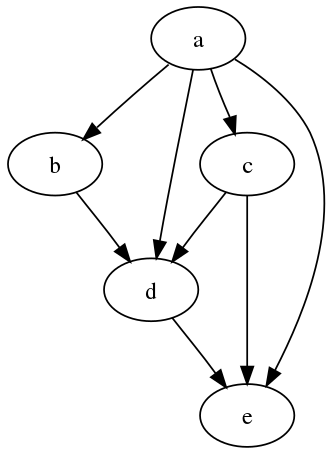

## 3. The Maths Behind the Bayesian Network

An acyclic directed graph is used to create a Bayesian network, which is a probability model. It’s factored by utilizing a single conditional probability distribution for each variable in the model, whose distribution is based on the parents in the graph. The simple principle of probability underpins Bayesian models. So, first, let’s define conditional probability and joint probability distribution.

**Conditional Probability**

Conditional probability is a measure of the likelihood of an event occurring provided that another event has already occurred (through assumption, supposition, statement, or evidence). If A is the event of interest and B is known or considered to have occurred, the conditional probability of A given B is generally stated as P(A|B) or, less frequently, PB(A) if A is the event of interest and B is known or thought to have occurred. This can also be expressed as a percentage of the likelihood of B crossing with A:
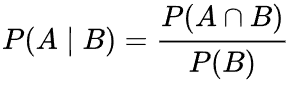

**Joint Probability**

The chance of two (or more) events together is known as the joint probability. The sum of the probabilities of two or more random variables is the joint probability distribution.

For example, the joint probability of events A and B is expressed formally as:

The letter P is the first letter of the alphabet (A and B).
The upside-down capital “U” operator or, in some situations, a comma “,” represents the “and” or conjunction.
P(A ^ B)
P(A, B)
By multiplying the chance of event A by the likelihood of event B, the combined probability for occurrences A and B is calculated.

**Posterior Probability**

In Bayesian statistics, the conditional probability of a random occurrence or an ambiguous assertion is the conditional probability given the relevant data or background. “After taking into account the relevant evidence pertinent to the specific subject under consideration,” “posterior” means in this case.

The probability distribution of an unknown quantity interpreted as a random variable based on data from an experiment or survey is known as the posterior probability distribution.

## 4. Inferencing with Bayesian Network in Python

In this demonstration, we’ll use Bayesian Networks to solve the well-known Monty Hall Problem. Let me explain the Monty Hall problem to those of you who are unfamiliar with it:

This problem entails a competition in which a contestant must choose one of three doors, one of which conceals a price. The show’s host (Monty) unlocks an empty door and asks the contestant if he wants to swap to the other door after the contestant has chosen one. 

The decision is whether to keep the current door or replace it with a new one. It is preferable to enter by the other door because the price is more likely to be higher. To come out from this ambiguity let’s model this with a Bayesian network.

For this demonstration, we are using a python-based package pgmpy is a Bayesian Networks implementation written entirely in Python with a focus on modularity and flexibility. Structure Learning, Parameter Estimation, Approximate (Sampling-Based) and Exact inference, and Causal Inference are all available as implementations. 

In [9]:
# Defining Bayesian Structure
model = BayesianNetwork([('Guest', 'Host'), ('Price', 'Host')])

In [10]:
# Defining the CPDs:
cpd_guest = TabularCPD('Guest', 3, [[0.33], [0.33], [0.33]])
cpd_price = TabularCPD('Price', 3, [[0.33], [0.33], [0.33]])
cpd_host = TabularCPD('Host', 3, [[0, 0, 0, 0, 0.5, 1, 0, 1, 0.5],
                            [0.5, 0, 1, 0, 0, 0, 1, 0, 0.5],
                            [0.5, 1, 0, 1, 0.5, 0, 0, 0, 0]],
                  evidence=['Guest', 'Price'], evidence_card=[3, 3])

In [11]:
# Associating the CPDs with the network structure.
model.add_cpds(cpd_guest, cpd_price, cpd_host)

Now we will check the model structure and associated conditional probability distribution by the argument get_cpds() will return True if every this is fine else through an error msg.

In [12]:
model.check_model()

True

Now let’s infer the network, if we want to check at the next step which door will the host open now. For that, we need access to the posterior probability from the network and while accessing we need to pass the evidence to the function. Evidence is needed to be given when we are evaluating posterior probability, here in our task evidence is nothing but which door is Guest selected and where is the Price.

In [13]:
# Infering the posterior probability
infer = VariableElimination(model)
posterior_p = infer.query(['Host'], evidence={'Guest': 2, 'Price': 2})
print(posterior_p)

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+---------+-------------+
| Host    |   phi(Host) |
+=========+=============+
| Host(0) |      0.5000 |
+---------+-------------+
| Host(1) |      0.5000 |
+---------+-------------+
| Host(2) |      0.0000 |
+---------+-------------+


Now, let’s plot our above model. This can be done with the help of Network and Pylab. NetworkX is a Python-based software package for constructing, altering, and researching the structure, dynamics, and function of complex networks. PyLab is a procedural interface to the object-oriented charting toolkit Matplotlib, and it is used to examine large complex networks represented as graphs with nodes and edges.

In [14]:
pip install decorator==5.0.7


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
model

In [19]:
#nx.draw(model,with_labels=False)
#plt.savefig('model.png')
#plt.close()

[<a href="#Content">Back to Content</a>]